# ARUCO markers: basics

## 1:  Marker creation

In [1]:
import numpy as np
import cv2, PIL
from cv2 import aruco
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

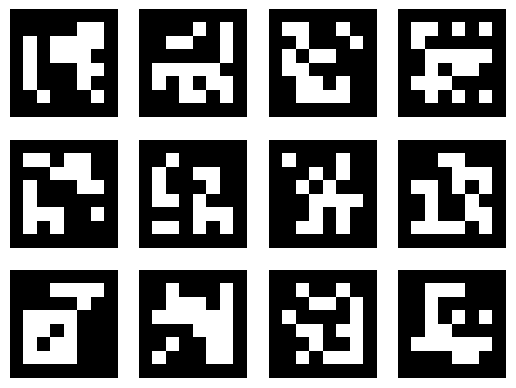

In [37]:
aruco_dict = aruco.getPredefinedDictionary(aruco.DICT_6X6_250)

fig = plt.figure()
nx = 4
ny = 3
for i in range(1, nx*ny+1):
    ax = fig.add_subplot(ny,nx, i)
    img = aruco.generateImageMarker(aruco_dict, i, 1000)
    plt.imshow(img, cmap = mpl.cm.gray, interpolation = "nearest")
    ax.axis("off")

plt.savefig("data/markers.pdf")    
plt.show()

## 2: Print, cut, stick and take a picture

<IPython.core.display.Javascript object>


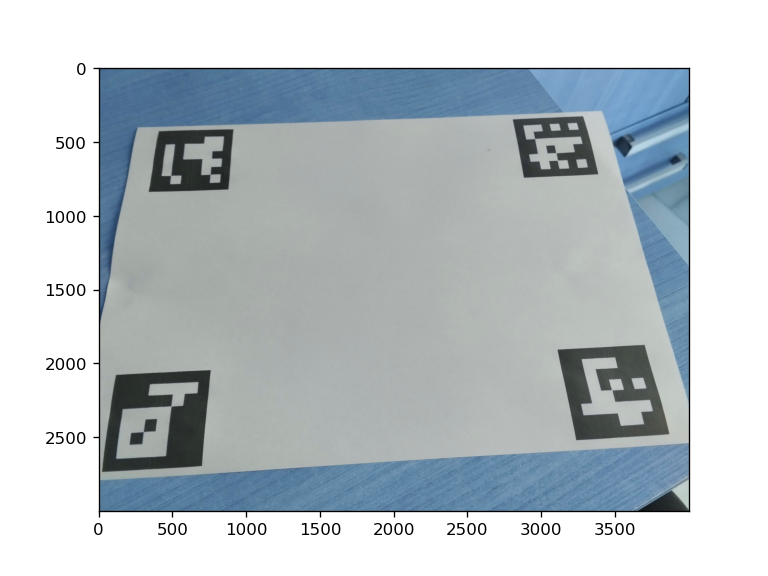

In [10]:
frame = cv2.imread("plantilla1.jpg")
plt.figure()
plt.imshow(frame)
plt.show()

## 3: Post processing

In [11]:
%%time
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
aruco_dict = aruco.getPredefinedDictionary(aruco.DICT_6X6_250)
parameters =  aruco.DetectorParameters()
detector = aruco.ArucoDetector(aruco_dict, parameters)
corners, ids, rejectedImgPoints = detector.detectMarkers(gray)
frame_markers = aruco.drawDetectedMarkers(frame.copy(), corners, ids)

CPU times: total: 156 ms
Wall time: 115 ms


Pretty fast processing !

## 4: Results

<IPython.core.display.Javascript object>


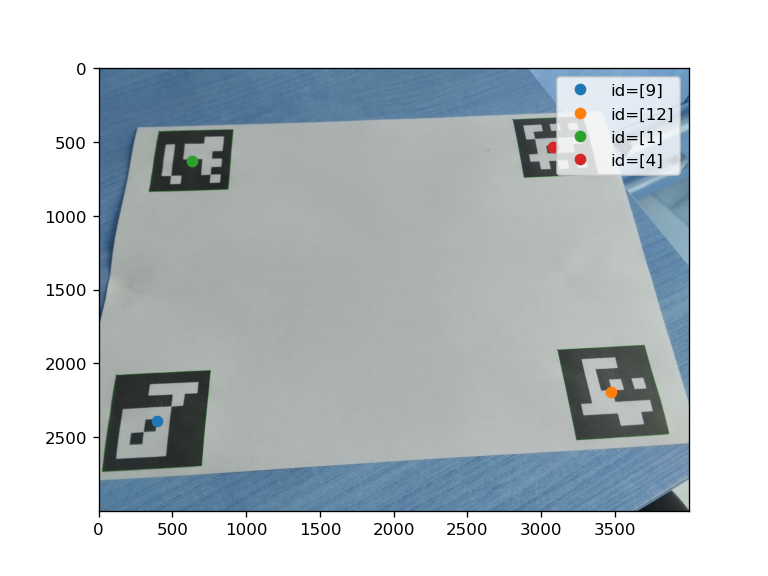

In [12]:
plt.figure()
plt.imshow(frame_markers)
for i in range(len(ids)):
    c = corners[i][0]
    plt.plot([c[:, 0].mean()], [c[:, 1].mean()], "o", label = "id={0}".format(ids[i]))
plt.legend()
plt.show()

In [13]:
def quad_area(data):
    l = data.shape[0]//2
    corners = data[["c1", "c2", "c3", "c4"]].values.reshape(l, 2,4)
    c1 = corners[:, :, 0]
    c2 = corners[:, :, 1]
    c3 = corners[:, :, 2]
    c4 = corners[:, :, 3]
    e1 = c2-c1
    e2 = c3-c2
    e3 = c4-c3
    e4 = c1-c4
    a = -.5 * (np.cross(-e1, e2, axis = 1) + np.cross(-e3, e4, axis = 1))
    return a

corners2 = np.array([c[0] for c in corners])

data = pd.DataFrame({"x": corners2[:,:,0].flatten(), "y": corners2[:,:,1].flatten()},
                   index = pd.MultiIndex.from_product( 
                           [ids.flatten(), ["c{0}".format(i )for i in np.arange(4)+1]], 
                       names = ["marker", ""] ))

data = data.unstack().swaplevel(0, 1, axis = 1).stack()
data["m1"] = data[["c1", "c2"]].mean(axis = 1)
data["m2"] = data[["c2", "c3"]].mean(axis = 1)
data["m3"] = data[["c3", "c4"]].mean(axis = 1)
data["m4"] = data[["c4", "c1"]].mean(axis = 1)
data["o"] = data[["m1", "m2", "m3", "m4"]].mean(axis = 1)
data

c1      c2      c3      c4      m1      m2      m3      m4  \
marker                                                                     
1      x   404.0   909.0   874.0   334.0   656.5   891.5   604.0   369.0   
       y   429.0   416.0   822.0   836.0   422.5   619.0   829.0   632.5   
4      x  2800.0  3277.0  3379.0  2875.0  3038.5  3328.0  3127.0  2837.5   
       y   348.0   330.0   718.0   742.0   339.0   524.0   730.0   545.0   
9      x   115.0   756.0   695.0    19.0   435.5   725.5   357.0    67.0   
       y  2079.0  2047.0  2695.0  2733.0  2063.0  2371.0  2714.0  2406.0   
12     x  3102.0  3692.0  3860.0  3231.0  3397.0  3776.0  3545.5  3166.5   
       y  1907.0  1875.0  2478.0  2520.0  1891.0  2176.5  2499.0  2213.5   

                o  
marker             
1      x   630.25  
       y   625.75  
4      x  3082.75  
       y   534.50  
9      x   396.25  
       y  2388.50  
12     x  3471.25  
       y  2195.00

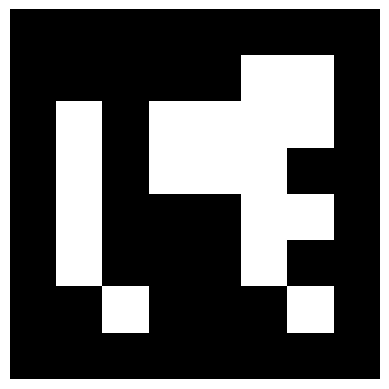

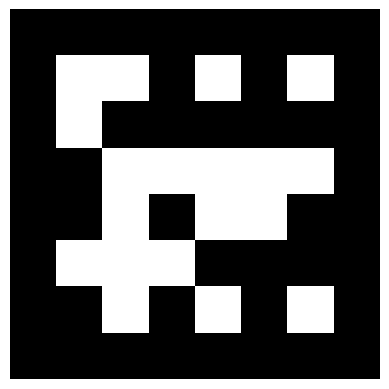

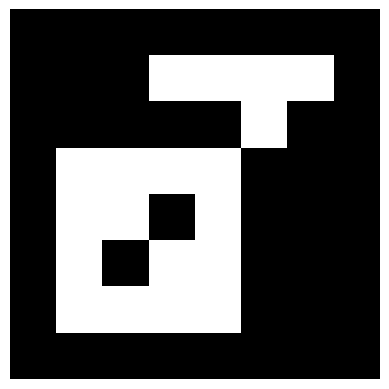

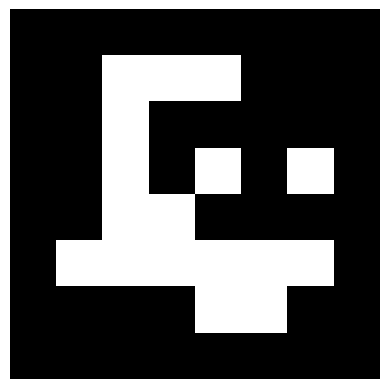

In [67]:
aruco_dict = aruco.getPredefinedDictionary(aruco.DICT_6X6_250)

aruco_images = []
for i in [1,4,9,12]:
    img = aruco.generateImageMarker(aruco_dict, i, 400)
    plt.imshow(img, cmap = mpl.cm.gray, interpolation = "nearest")
    plt.axis("off")
    plt.show()
    aruco_images.append(img)

In [68]:
import cv2
import numpy as np

# Assuming aruco_images[0] is a grayscale image; if it's color, this needs to adjust for 3 channels.
ny, nx = aruco_images[0].shape[:2]  # This handles both color and grayscale images

# Define A4 size at a scale (10x for example mm to pixel-like scaling if 1mm = 10 pixels)
a4_width, a4_height = 297*10,210*10  # A4 size in mm * 10 (landscape)
# Create a new blank white image for A4
a4_image = np.ones((a4_height, a4_width), dtype=np.uint8) * 255 
margin = 0
# Paste the original image into the four corners
# Top-left corner
a4_image[margin+0:margin+ny, margin+0:margin+nx] = aruco_images[0]
# Top-right corner
a4_image[margin+0:margin+ny, -margin+a4_width-nx:-margin+a4_width] = aruco_images[1]
# Bottom-left corner
a4_image[-margin+a4_height-ny:-margin+a4_height, margin+0:margin+nx] = aruco_images[2]
# Bottom-right corner
a4_image[-margin+a4_height-ny:-margin+a4_height, -margin+a4_width-nx:-margin+a4_width] = aruco_images[3]

cv2.imwrite('data/four_markers_1_4_9_12.png', a4_image)



True